# Анализ гипотез для увеличения выручки - учебный проект
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

<b>Задачи исследования:</b>
<p>1. Изучить имеющиеся гипотезы;
<p>2. Приоритизировать имеющиеся гипотезы с помощью фреймворков ICE,RICE;
<p>3. Провести анализ A/B тестов;
<p>4. Сделать соответствующие выводы относительно имеющихся гипотез.

<b>Ход исследования:</b>
<p>Данные об имеющихся гипотезах (hypothesis) я получу из файла 'hypothesis.csv'. Именно по этим данным будет выполнятся приоритизация гипотез. Для А/В теста данные о заказах (orders) будут получены из файла 'orders.csv', о посетителях (visitors) - из файла 'visitors.csv'. О качестве данных ничего не известно. Поэтому перед тем, как приступить к задачам исследования, необходимо провести обзор данных.
<p>Я проверю данные на наличие ошибок и их влияние на результат исследования. Далее, на этапе предобработки, я исправлю ошибки в данных там, где это возможно и где это не приведёт к искажению результата. Затем создам необходимые столбцы и приступлю к проведению исследовательского анализа, а также приоритизации гипотез и проведению А/В теста.
<p><b>Таким образом, исследование будет состоять из следующих этапов:</b>
        <p>- Обзор данных
        <p>- Предобработка данных
        <p>- Приоритизация гипотез с помощью фреймворков ICE,RICE
        <p>- Построение соответствующих графиков и их анализ
        <p>- Проведение А/В теста и формулировка сооветствующих выводов
        <p>- Общий вывод

<b>Столбцы датасета:</b>
- с информацией о гипотезах (hypothesis):
<p></p>
<p>"Hypothesis" — краткое описание гипотезы
<p>"Reach" — охват пользователей по 10-балльной шкале
<p>"Impact" — влияние на пользователей по 10-балльной шкале
<p>"Confidence" — уверенность в гипотезе по 10-балльной шкале
<p>"Efforts"  — затраты ресурсов на проверку гипотезы по 10-балльной шкале
    <p></p>

- с информацией о заказах (orders):
<p></p>
<p>"transactionId" — идентификатор заказа
<p>"visitorId" — идентификатор пользователя, совершившего заказ
<p>"date" — дата, когда был совершён заказ
<p>"revenue" — выручка заказа
<p>"group" — группа A/B-теста, в которую попал заказ
    <p></p>
- с информацией о посетителях (visitors):
<p></p>
<p>"date" — дата
<p>"group" — группа A/B-теста
<p>"visitors" — количество пользователей в указанную дату в указанной группе A/B-теста

### Изучение исходных данных

#### Загружаем библиотеки

In [1]:
import os
import pandas as pd
import seaborn as sb
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
pth1 = '/datasets/hypothesis.csv'
pth2 = '/datasets/orders.csv'
pth3 = '/datasets/visitors.csv'

pth4 = 'C:/Users/Даша/Desktop/Бизнес-показатели/Проект 2/hypothesis.csv'
pth5 = 'C:/Users/Даша/Desktop/Бизнес-показатели/Проект 2/orders.csv'
pth6 = 'C:/Users/Даша/Desktop/Бизнес-показатели/Проект 2/visitors.csv'

if os.path.exists(pth1):
    hypothesis = pd.read_csv(pth1)
elif os.path.exists(pth4):
    hypothesis = pd.read_csv(pth4)
else:
    print('Something is wrong')
    
if os.path.exists(pth2):
    orders = pd.read_csv(pth2)
elif os.path.exists(pth5):
    orders = pd.read_csv(pth5)
else:
    print('Something is wrong')

if os.path.exists(pth3):
    visitors = pd.read_csv(pth3)
elif os.path.exists(pth6):
    visitors = pd.read_csv(pth6)
else:
    print('Something is wrong')

#### Выводим первые 10 строк таблиц, изучаем данные

In [3]:
pd.options.display.max_colwidth = 120

display('hypothesis',hypothesis)
print()

display('orders',orders.head(10))
print()

display('visitors',visitors.head(10))

'hypothesis'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


'orders'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


'visitors'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


#### Используем метод 'info' для более глубокого понимания полученных данных

In [4]:
display('hypothesis')
hypothesis.info()
print()

display('orders')
orders.info()
print()

display('visitors')
visitors.info()

'hypothesis'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes



'orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB



'visitors'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### Редактируем названия столбцов
<p>Переводим все названия столбцов в нижний регистр

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

Добавляем ' _ ' в названия столбцов, состоящих из 2 слов:

In [6]:
orders = orders.rename(columns={'transactionid':'transaction_id','visitorid':'visitor_id'})

Проверяем

In [7]:
display('hypothesis',hypothesis.columns)
print()

display('orders',orders.columns)
print()

display('visitors',visitors.columns)

'hypothesis'

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

'orders'

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

'visitors'

Index(['date', 'group', 'visitors'], dtype='object')

##### Установим границы изучаемого периода

In [8]:
min_date=pd.to_datetime(orders['date'], format='%Y-%m-%d').min()
max_date=pd.to_datetime(orders['date'], format='%Y-%m-%d').max()
days_num = (max_date - min_date).days
display(min_date,max_date,days_num)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

30

#### Строим общую гистограмму для числовых столбцов таблиц c информацией о заказах и посетителях

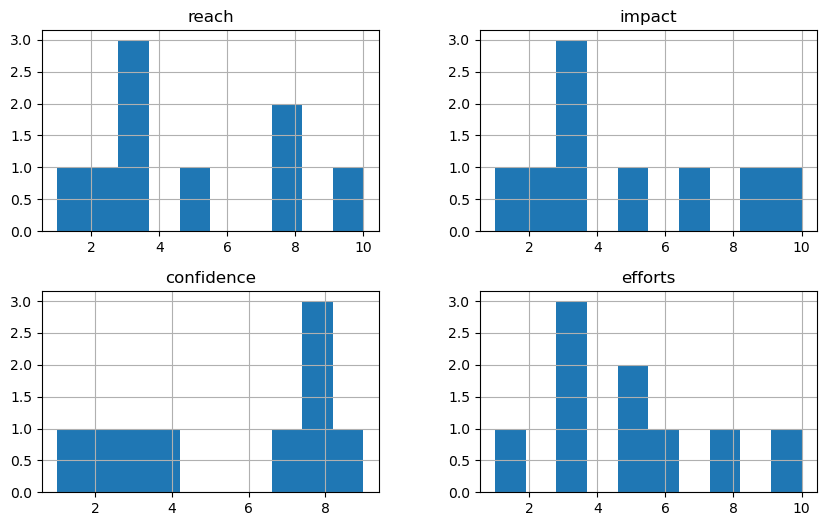

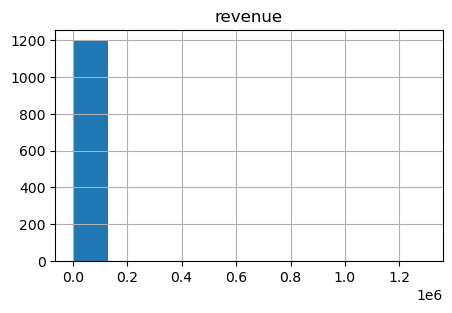

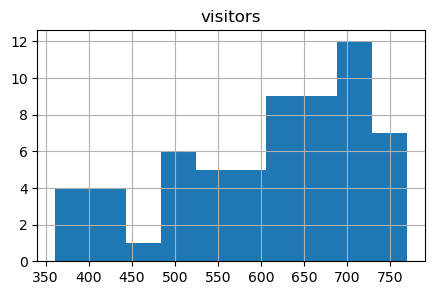

In [9]:
hypothesis.hist(figsize=(10, 6),bins=10);

orders.hist(column='revenue',figsize=(5, 3));

visitors.hist(column='visitors',figsize=(5, 3));

Как видно из полученных гистограмм показатель выручки имеет преимущественно околонулевые значения. Соответственно, можно сделать вывод, что либо в данных очень много выбросов, либо большинство единичных покупок были совершены на небольшую сумму. Количество посетителей распределено неравномерно, большинство значений расположено около 600-750.

### Предобработка данных

#### Проверяем, в каких столбцах есть пропуски

In [10]:
display('hypothesis',hypothesis.isna().sum())
print()

display('orders',orders.isna().sum())
print()

display('visitors',visitors.isna().sum())

'hypothesis'

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

'orders'

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

'visitors'

date        0
group       0
visitors    0
dtype: int64

Пропусков нет

#### Рассмотрим типы данных в каждом столбце

In [11]:
display('hypothesis',hypothesis.dtypes)
print()

display('orders',orders.dtypes)
print()

display('visitors',visitors.dtypes)

'hypothesis'

hypothesis    object
reach          int64
impact         int64
confidence     int64
efforts        int64
dtype: object

'orders'

transaction_id     int64
visitor_id         int64
date              object
revenue            int64
group             object
dtype: object

'visitors'

date        object
group       object
visitors     int64
dtype: object

##### Необходимо изменить тип данных в столбцах:
<p><b>- Дата, когда был совершён заказ (date)</b> датасета с <b>заказами (orders)</b>, данные необходимо привести к типу datetime для возможности дальнейших вычислений,</p>
<p><b>- Дата посещения (date)</b> датасета с <b>посетителями (visitors)</b>, данные необходимо привести к типу datetime для возможности дальнейших вычислений,</p>
<p><b>- Группа A/B-теста, в которую попал заказ (group)</b> датасета с <b>заказами (orders)</b>, данные необходимо привести к типу string для упрощения дальнейшей обработки и группировки,</p>
<p><b>- Группа A/B-теста (group)</b> датасета с <b>посетителями (visitors)</b>, данные необходимо привести к типу string для упрощения дальнейшей обработки и группировки.</p>

##### Меняем тип данных в столбце Дата, когда был совершён заказ (date)

In [12]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

orders['date']

0      2019-08-15
1      2019-08-15
2      2019-08-15
3      2019-08-15
4      2019-08-15
          ...    
1192   2019-08-14
1193   2019-08-14
1194   2019-08-14
1195   2019-08-14
1196   2019-08-15
Name: date, Length: 1197, dtype: datetime64[ns]

##### Меняем тип данных в столбце Дата посещения (date)

In [13]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

visitors['date']

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-05
        ...    
57   2019-08-27
58   2019-08-28
59   2019-08-29
60   2019-08-30
61   2019-08-31
Name: date, Length: 62, dtype: datetime64[ns]

##### Меняем тип данных в столбце Группа A/B-теста, в которую попал заказ (group)

In [14]:
orders['group'] = orders['group'].astype('str')

orders['group']

0       B
1       B
2       A
3       B
4       B
       ..
1192    B
1193    A
1194    A
1195    A
1196    B
Name: group, Length: 1197, dtype: object

##### Меняем тип данных в столбце Группа A/B-теста (group)

In [15]:
visitors['group'] = visitors['group'].astype('str')

visitors['group']

0     A
1     A
2     A
3     A
4     A
     ..
57    B
58    B
59    B
60    B
61    B
Name: group, Length: 62, dtype: object

#### Устранение дубликатов

In [16]:
display('hypothesis',hypothesis.duplicated().sum())
print()

display('orders',orders.duplicated().sum())
print()

display('visitors',visitors.duplicated().sum())

'hypothesis'

0

'orders'

0

'visitors'

0

Явных дубликатов в датафреймах нет.

##### Устраняем неявные дубликаты

<b>Неявные дубликаты могут присутствовать в столбцах:</b>
<p><b>- Группа A/B-теста, в которую попал заказ (group)</b> датасета с заказами (orders) - названия групп могут быть написаны в разном регистре или содержать опечатки;
<p><b>- Группа A/B-теста (group)</b> датасета с посетителями (visitors) - названия групп могут быть написаны в разном регистре или содержать опечатки.

##### Устранение неявных дубликатов в столбце Группа A/B-теста, в которую попал заказ (group)
Изучим уникальные значения в данном столбце и их количество

In [17]:
display(orders[orders['group'].duplicated() == False]['group'].count())

display(orders['group'].unique())

2

array(['B', 'A'], dtype=object)

Дубликатов нет

##### Устранение неявных дубликатов в столбце Группа A/B-теста (group)
Изучим уникальные значения в данном столбце и их количество

In [18]:
display(visitors[visitors['group'].duplicated() == False]['group'].count())

display(visitors['group'].unique())

2

array(['A', 'B'], dtype=object)

Дубликатов нет

##### Проверим, не попадают ли какие-то пользователи в обе группы
Сгруппируем значения группы по идентификатору пользователя в таблице с заказами и проверим есть ли пользователи, принадлежащие не одной, а большему количеству групп.

In [19]:
visitor_groups=orders.groupby('visitor_id', as_index=False).agg({'group': 'nunique'})
visitor_groups[visitor_groups['group'] > 1].count()

visitor_id    58
group         58
dtype: int64

Видим, что существует 58 пользователей, относящихся сразу к двум группам. Уберём их из выборки, чтобы не искажать результаты.

In [20]:
visitor_duplicated = visitor_groups[visitor_groups['group'] > 1]

orders = orders.drop(index=visitor_duplicated.index).reset_index(drop=True)

#### Проверка выбросов

<b>Выбросы могут присутствовать в столбцах:</b>
<p><b>- Охват пользователей по 10-балльной шкале (reach)</b> датасета с гипотезами (hypothesis) - значения должны располагаться в диапазоне от 0 до 10;
<p><b>- Влияние на пользователей по 10-балльной шкале (impact)</b> датасета с гипотезами (hypothesis) - значения должны располагаться в диапазоне от 0 до 10;
<p><b>- Уверенность в гипотезе по 10-балльной шкале (confidence)</b> датасета с гипотезами (hypothesis) - значения должны располагаться в диапазоне от 0 до 10;
<p><b>- Затраты ресурсов на проверку гипотезы по 10-балльной шкале (efforts)</b> датасета с гипотезами (hypothesis) - значения должны располагаться в диапазоне от 0 до 10.

##### Устранение выбросов в столбце Охват пользователей по 10-балльной шкале (reach)
Изучим значения в данном столбце

array([ 3,  2,  8,  5, 10,  1], dtype=int64)

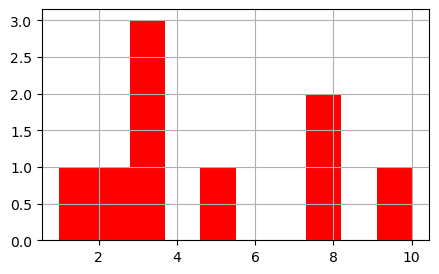

In [21]:
display(hypothesis['reach'].unique())

hypothesis['reach'].hist(bins=10,figsize=(5, 3),color='red');

Выбросов нет.

##### Устранение выбросов в столбце Влияние на пользователей по 10-балльной шкале (impact)
Изучим значения в данном столбце

array([10,  5,  3,  1,  2,  7,  9], dtype=int64)

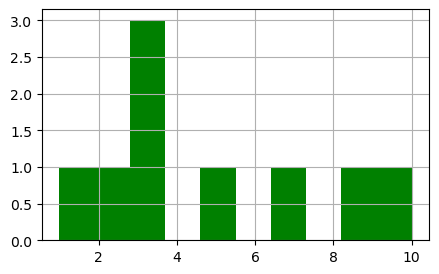

In [22]:
display(hypothesis['impact'].unique())

hypothesis['impact'].hist(bins=10,figsize=(5, 3),color='green');

Выбросов нет.

##### Устранение выбросов в столбце Уверенность в гипотезе по 10-балльной шкале (confidence)
Изучим значения в данном столбце

array([8, 4, 7, 3, 1, 2, 9], dtype=int64)

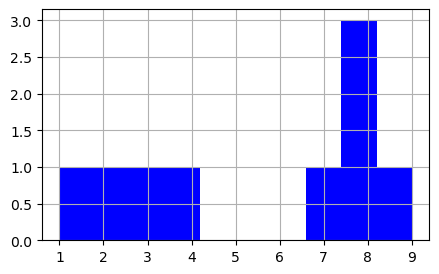

In [23]:
display(hypothesis['confidence'].unique())

hypothesis['confidence'].hist(bins=10,figsize=(5, 3),color='blue');

Выбросов нет.

##### Устранение выбросов в столбце Затраты ресурсов на проверку гипотезы по 10-балльной шкале (efforts)
Изучим значения в данном столбце

array([ 6, 10,  3,  8,  1,  5], dtype=int64)

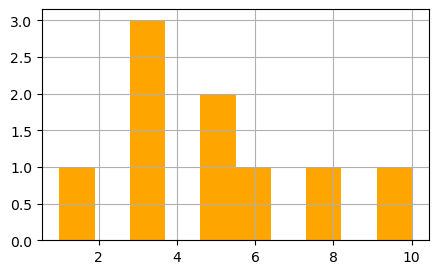

In [24]:
display(hypothesis['efforts'].unique())

hypothesis['efforts'].hist(bins=10,figsize=(5, 3),color='orange');

Выбросов нет.

#### Вывод по разделу
Полученные данные являются достаточно качественными, пропуски и дубликаты отсутствуют. Для дальнейшего использования данных необходимо было только привести столбцы датасетов, содержащие информацию о дате, к формату datetime, а также столбцы с данными о группе A/B-теста к строковому формату.

### Приоритизация гипотез

##### Выведем все гипотезы и изучим их

In [25]:
hypothesis['hypothesis']

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

#### Применим фреймворк ICE для приоритизации гипотез

In [26]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts'],2)

display(hypothesis.sort_values(by='ICE', ascending=False)[['hypothesis','ICE']]
        .reset_index(drop=True)
        .style.format({'ICE': '{:.2f}'})
        .background_gradient('coolwarm'))

,hypothesis,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Как видно из полученной таблицы, наиболее приоритетными являются 3 гипотезы, среди которых наиболее приоритетной можно обозначить "Запустить акцию, дающую скидку на товар в день рождения", имеющую наибольшее значение ICE - 16,2.

#### Применим фреймворк RICE для приоритизации гипотез

In [27]:
hypothesis['RICE'] = round(hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']/hypothesis['efforts'],2)

display(hypothesis.sort_values(by='RICE', ascending=False)[['hypothesis','RICE']]
        .reset_index(drop=True)
        .style.format({'RICE': '{:.2f}'})
        .background_gradient('coolwarm'))

,hypothesis,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
4,"Запустить акцию, дающую скидку на товар в день рождения",16.20
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Из полученной таблицы видно, что наиболее приоритетной гипотезой является "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Показатель RICE для неё в 2 раза превышает таковой для следующей по приоритетности гипотезы и составляет 112. Также, как наиболее приоритетные можно выделить ещё 3 гипотезы, имеющие высокий показатель RICE: 56,40 и 40 соответственно. 

<p>Стоит отметить, что для двух фреймворков распределение гипотез по приоритетности различается. Это произошло, поскольку некоторые гипотезы, подразумевающие значительные изменения при достаточно низуих затратах могут затрагивать лишь небольшое количество пользователей. Поэтому при добавлении показателя "reach" значительно меняется приоритезация.

##### Составим общую таблицу

In [28]:
display(hypothesis.sort_values(by=['RICE','ICE'], ascending=False)[['hypothesis','RICE','ICE']]
        .reset_index(drop=True)
        .style.format({'RICE': '{:.2f}','ICE': '{:.2f}'})##### Выведем все гипотезы и изучим их
        .background_gradient('coolwarm'))

,hypothesis,RICE,ICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00,11.20
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00,7.00
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00,13.33
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00,8.00
4,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00,1.12
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00,2.00
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00,1.33
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00,1.00


#### Вывод по разделу

Суммируя вышесказанное, наиболее приоритетными можно выбрать 3 гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
<p></p> 
<p>Они имеют наибольшие значения как ICE, так и RICE, а значит, несут в себе достаточно важные изменения при значительных масштабах привлечения пользователей к ним.

### Анализ A/B-теста

#### Визуально оценим результаты A/B-теста
Для этого построим соответствующие графики по кумулятивным метрикам

##### Построим график кумулятивной выручки по группам

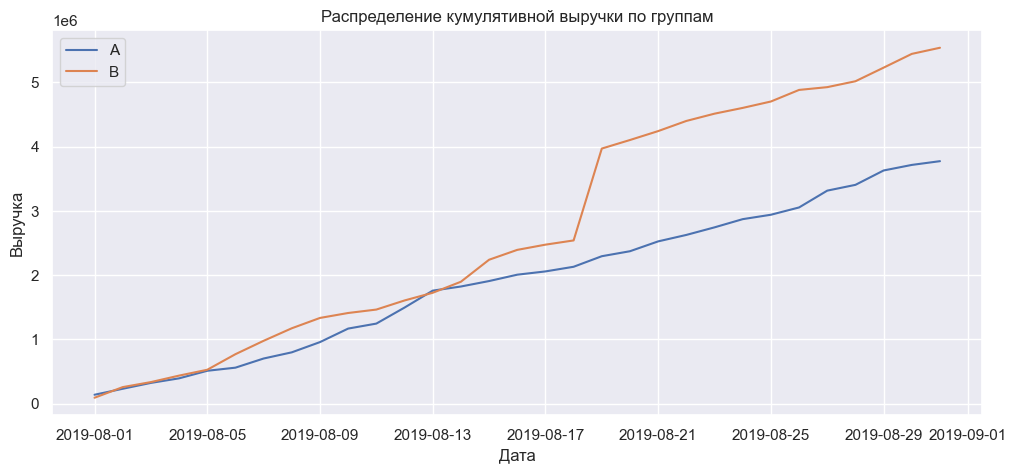

In [29]:
register_matplotlib_converters()
sb.set(rc = {'figure.figsize':(12,5)})

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Распределение кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show();

Выручка почти равномерно увеличивается в течение всего теста. Стоит также отметить, что группа В стабильно лидирует на протяжении всего теста. Однако график выручки группы В резко возрастает в августе. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке, от них неоходимо избавиться.

##### Построим график кумулятивного среднего чека по группам

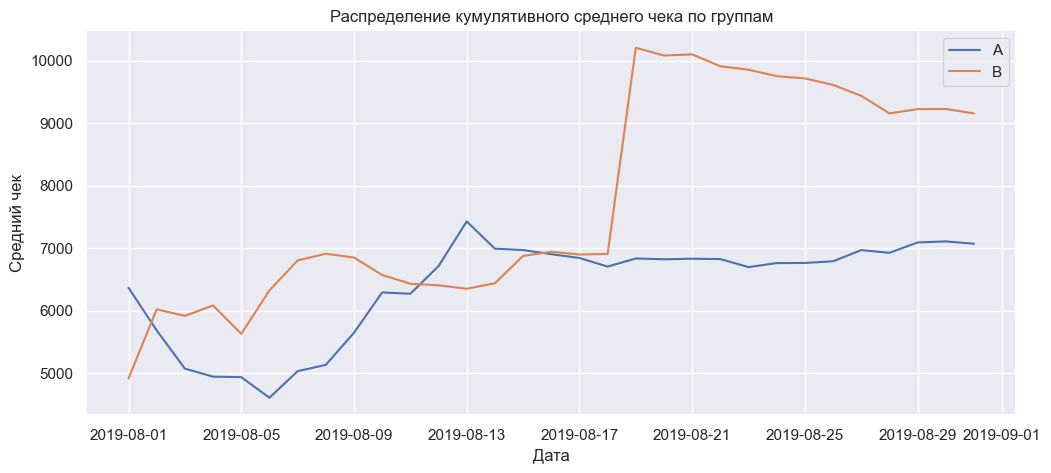

In [30]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend() 
plt.title('Распределение кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show();

Средний чек становится равномерным ближе к концу теста: установился для группы A и падает после резкого скачка для группы B. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике). 

##### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

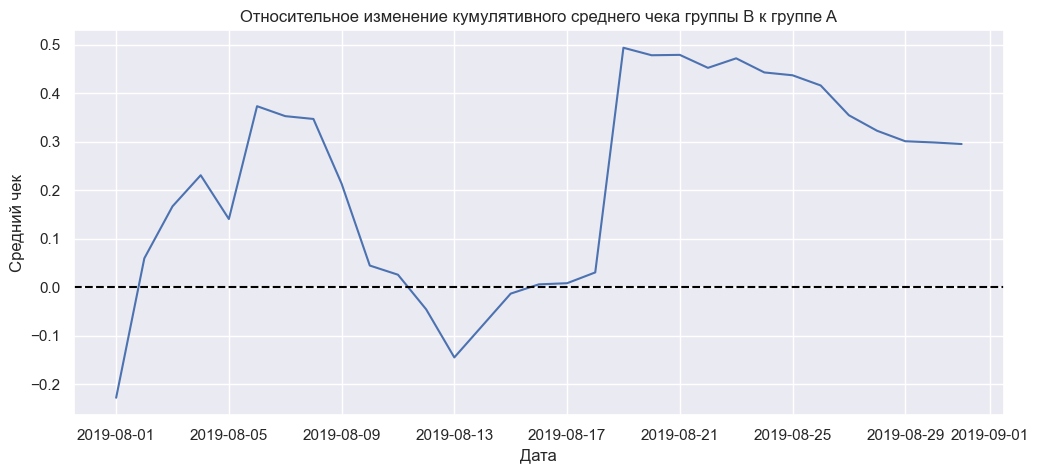

In [31]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',\
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show();

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы. Особенно стоит обратить внимание на скачки в начале и конце августа, а также резкий провал 13 числа.

##### Построим график кумулятивного среднего количества заказов на посетителя по группам

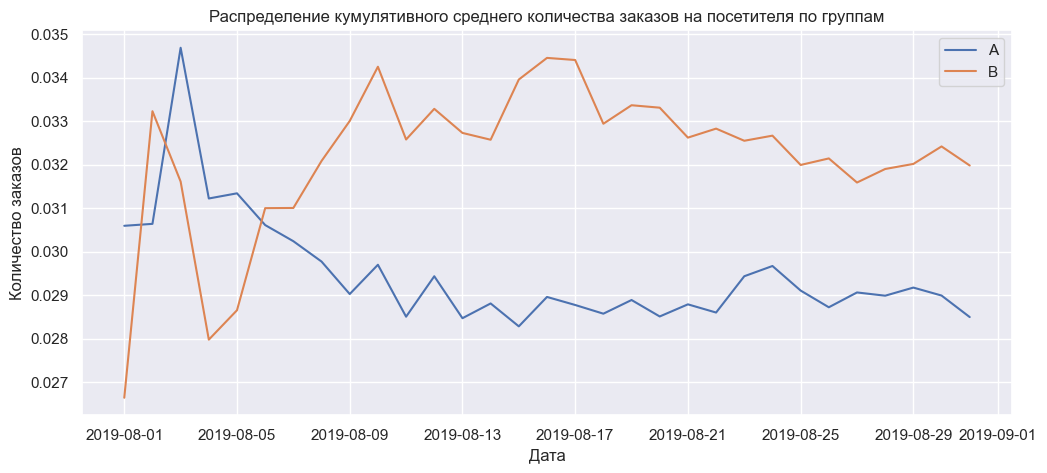

In [32]:
# датафрейм с кумулятивным количеством заказов и кумулятивным количеством посетителей по дням в группе А
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date','orders','visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивным количеством посетителей по дням в группе B
cumulativeOrdersB = cumulativeData[cumulativeData['group']=='B'][['date','orders','visitors']]

# Строим график выручки группы А
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label='B')

plt.legend()
plt.title('Распределение кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show();

Cреднее количество заказов на посетителя становится равномерным ближе к концу теста: установился для группы A и группы B. Причём для группы В он стабильно выше. Возможно, в обе группы в первой половине теста попали крупные заказы (резкий всплеск на графике).

##### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

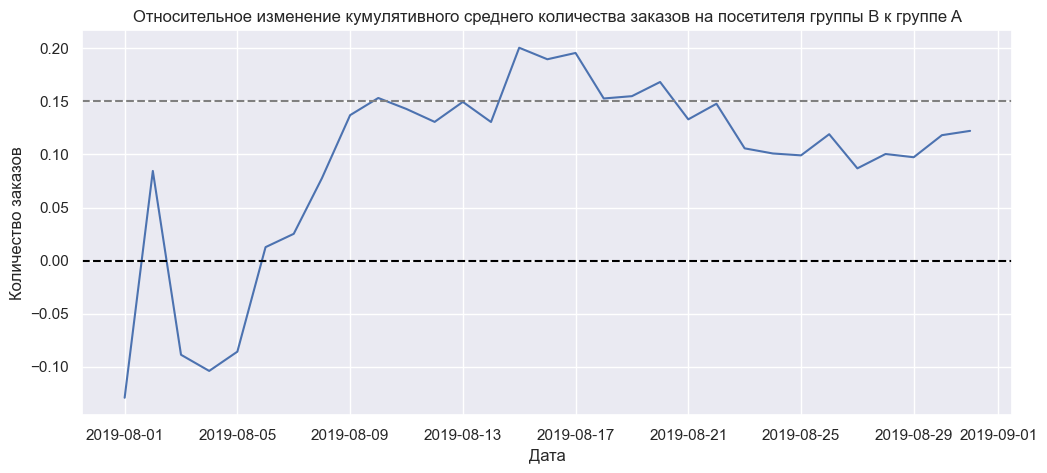

In [33]:
mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB, left_on='date', right_on='date', how='left',\
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])\
         /(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show();

Результаты теста значительно и резко менялись в несколько раз в начале теста, затем виден значительный прирост и стабилизация. Видимо, в начале теста было совершено аномальное количество заказов или было малое количество посетителей.

##### Построим точечный график количества заказов по пользователям

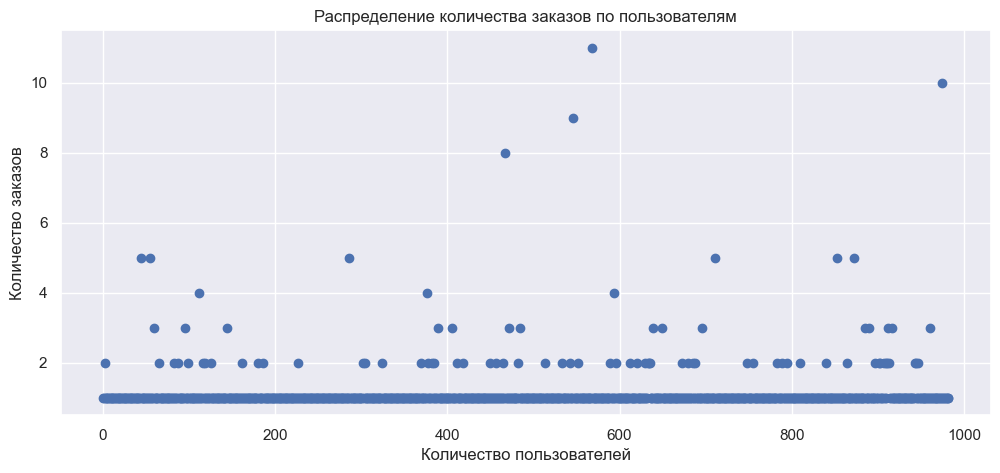

In [34]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show();

На основании графика можно сделать вывод, что много пользователей с 2-5 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

##### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [35]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2.  , 4.18])

Не более 5% пользователей оформляли больше чем 2 заказа. Выбререм 2-3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней.

##### Построим точечный график стоимостей заказов

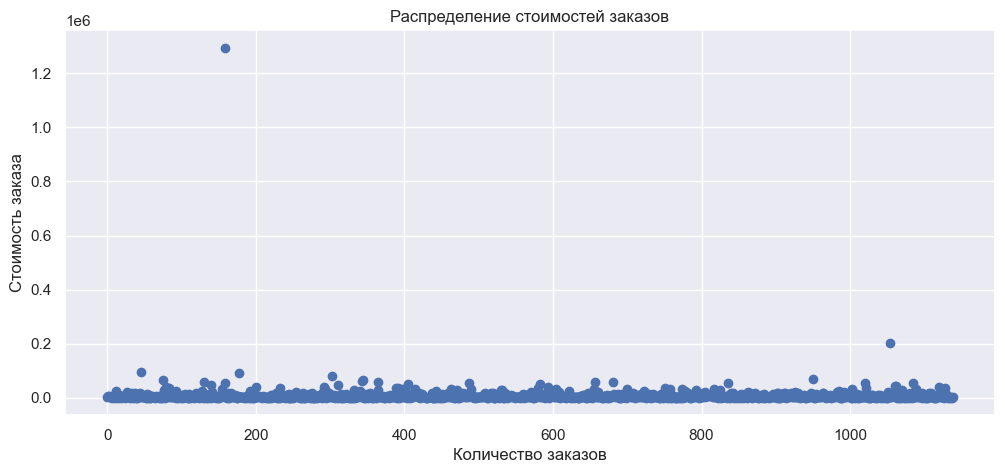

In [36]:
revenueByOrders = (
    orders.groupby('transaction_id', as_index=False)
    .agg({'revenue': 'sum'})
)
revenueByOrders.columns = ['orders', 'revenue']

x_values = pd.Series(range(0,len(revenueByOrders)))

plt.scatter(x_values, revenueByOrders['revenue'])

plt.title('Распределение стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')
plt.show();

Изменим масштаб, убрав выбросы, и более детально посмотрим на распределение стоимостей заказов.

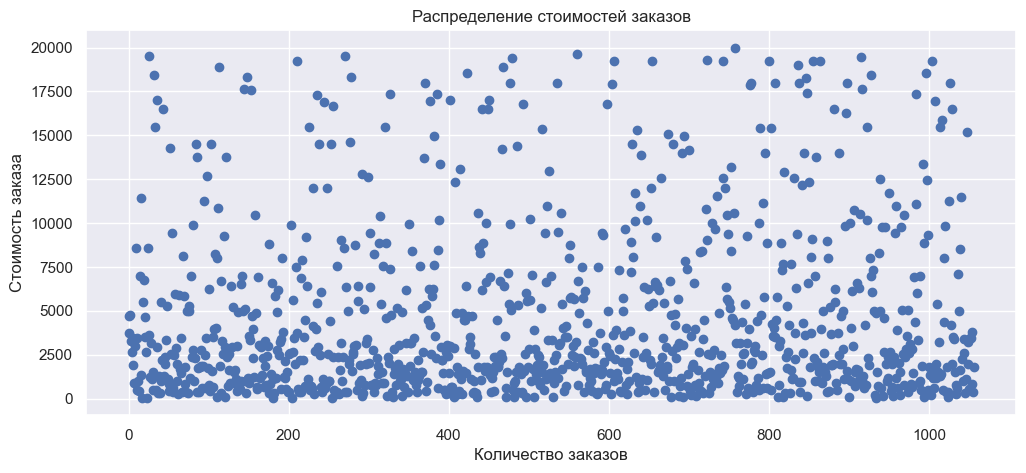

In [37]:
revenueByOrders2 = revenueByOrders[revenueByOrders['revenue'] < 20000]

x_values = pd.Series(range(0,len(revenueByOrders2)))

plt.scatter(x_values, revenueByOrders2['revenue'])

plt.title('Распределение стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')
plt.show();

Большинство заказов совершено на сумму в районе 0-15000 усл.ед. Есть выбросы в районе 20000 и 130000 усл.ед.

In [38]:
np.percentile(revenueByOrders['revenue'], [95, 99])

array([27638.5, 57623.4])

Не более 5% заказов стоили больше чем 28000 усл.ед. Выбререм 28000 усл.ед на один заказ за верхнюю границу стоимости заказа, и отсеим аномальные заказы по ней.

#### Посчитаем статистическую значимость

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
Сформулируем гипотезы. 
- Нулевая: Статистически значимых различий в среднем количестве заказов между группами по «сырым» данным нет. 
- Альтернативная: Статистически значимые различия в среднем между группами по «сырым» данным есть.

Подготовим данные: создадим таблицу data с необходимыми для анализа данными.

Названия столбцов данных:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B.

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,22,140029,19,93312,719,713
1,2019-08-02,19,92932,24,165531,619,581
2,2019-08-03,23,91483,14,78278,507,509
3,2019-08-04,16,70825,15,100762,717,770
4,2019-08-05,24,117798,22,91008,756,707


In [40]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders'].
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [41]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Для сравнения гипотез посчитаем их статистическую значимость, применим метод Манна-Уитни.Значение alpha = 0.05.

In [42]:
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print()
print('Относительный прирост среднего числа заказов группы B:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.038

Относительный прирост среднего числа заказов группы B: 0.122


p-value = 0.038 - меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, <b>отвергаем</b>. Однако относительное различие между группами равно всего 12,2%. Cреднее количество заказов группы B несколько выше количества заказов группы A.

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
Сформулируем гипотезы. 
- Нулевая: Статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет. 
- Альтернативная: Статистически значимые различия в среднем чеке заказа между группами по «сырым» данным есть.

In [43]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                                      orders[orders['group']=='B']['revenue'])[1]))
print()
print('Относительный прирост среднего чека заказа группы B:','{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                                                                               .mean()/orders[orders['group']=='A']['revenue']
                                                                               .mean()-1))

p-value: 0.734

Относительный прирост среднего чека заказа группы B: 0.295


p-value = 0.734 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, <b>не отвергаем</b>. Относительное различие среднего чека между сегментами 29.5%.

#### Уберём аномальные значения - "очистим" данные
Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

##### Узнаем, сколько всего аномальных пользователей

In [44]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(revenueByOrders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0])

1041    148427295
18      199603092
882     204675465
23      237748145
36      249864742
Name: visitor_id, dtype: int64

72

Всего 72 аномальных пользователя. 

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
Сформулируем гипотезы. 
- Нулевая: Статистически значимых различий в среднем количестве заказов между группами по «очищенным» данным нет. 
- Альтернативная: Статистически значимые различия в среднем между группами по «очищенным» данным есть.

In [45]:
#Обновим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [46]:
display('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print()
display('Относительный прирост среднего числа заказов группы B:','{0:.3f}'.format(sampleBFiltered.mean()\
                                                                                 /sampleAFiltered.mean()-1))

'p-value:'

'0.034'

'Относительный прирост среднего числа заказов группы B:'

'0.150'

p-value = 0.034 - меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительное различие между группами равно 15%. Cреднее количество заказов группы B несколько выше количества заказов группы A. Результаты по среднему количеству заказов практически не изменились. Прошлый p-value составлял 0.038, а относительный прирост - 0.122. 

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
Сформулируем гипотезы. 
- Нулевая: Статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет. 
- Альтернативная: Статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [47]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.633
-0.027


Р-value = 0.633 - больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем. Относительное различие среднего чека между сегментами 2.7%.
P-value почти не изменился: раньше был 0.734, но разница между сегментами сократилась с 29.5% до 2.7%. Интересно, что относительное различие между группами "перевернулось": если раньше средний чек группы B был значительно выше среднего чека группы A, то теперь разница почти пропала, однако группа А стала выше группы В по данному показателю.

#### Выводы по разделу

На основании проведённого исследования можно сделать следующие выводы:
- Статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий есть - среднее количество заказов группы B на 12,2% выше количества заказов группы A;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению:
- График различия среднего чека говорит о том, что результаты группы B значительно улучшились в середине теста и сейчас продолжают улучшаться.
<p></p>
<p>На основании расчётов, проведённых с помощью  <a href="http://www.evanmiller.org/ab-testing/sample-size.html">калькулятора размера выборки VWO</a>, необходимо было продолжать тест минимум в течение 22 дней для увеличения конверсии на 20%, он проводился в течение 30 дней. Исходя из обнаруженных фактов, тест следует завершить и признать успешным. Поскольку сегмент В начал показывать лучшие результаты примерно с середины периода проведения теста и стабилизировался в данном положении до его окончания, значит нововведения возымели успех среди посетителей и их стоит принять.

### Вывод

<p><b>Изучив полученные данные, можно сформировать следующие выводы:</b></p>

Данные качественные, без пропусков и дубликатов. Изучаемый период - с 1 по 31 августа 2019г. - всего за 30 дней;
<p>Относительно изучаемых гипотез и их приоритезации:</p>
<p> </p>
 
- При применении фреймворка ICE наиболее приоритетными являются 3 гипотезы, среди которых наиболее приоритетной можно обозначить "Запустить акцию, дающую скидку на товар в день рождения", имеющую наибольшее значение ICE - 16,2.
- При применении фреймворка RICE наиболее приоритетной гипотезой является "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Показатель RICE для неё в 2 раза превышает таковой для следующей по приоритетности гипотезы и составляет 112. Также, как наиболее приоритетные можно выделить ещё 3 гипотезы, имеющие высокий показатель RICE: 56,40 и 40 соответственно.
- Стоит отметить, что для двух фреймворков распределение гипотез по приоритетности различается. Это произошло, поскольку некоторые гипотезы, подразумевающие значительные изменения при достаточно низуих затратах могут затрагивать лишь небольшое количество пользователей. Поэтому при добавлении показателя "reach" значительно меняется приоритезация.
<p> </p>
<p>___________________________________________________________________________________________________________________________</p>
<p> </p>
<b>Относительно проводимого A/B тестирования</b>
<p>При визуализации результатов тестирования: были выявлены следующие закономерности</p>
<p> </p>
 
- Выручка почти равномерно увеличивается в течение всего теста. Стоит также отметить, что группа В стабильно лидирует на протяжении всего теста. Однако график выручки группы В резко возрастает в августе. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке, от них неоходимо избавиться.
- Средний чек становится равномерным ближе к концу теста: установился для группы A и падает после резкого скачка для группы B. Возможно, в группу B во второй половине теста попали крупные заказы.
- Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы. Особенно стоит обратить внимание на скачки в начале и конце августа, а также резкий провал 13 числа.
- Cреднее количество заказов на посетителя становится равномерным ближе к концу теста: установился для группы A и группы B. Причём для группы В он стабильно выше. Возможно, в обе группы в первой половине теста попали крупные заказы.
- Результаты теста значительно и резко менялись в несколько раз в начале теста, затем виден значительный прирост и стабилизация. Видимо, в начале теста было совершено аномальное количество заказов или было малое количество посетителей.
<p> </p>
<p>___________________________________________________________________________________________________________________________</p>
<p>При изучении данных были выделены следующие аномалии:</p>
<p> </p>
 
- Много пользователей с 2-5 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
- Не более 5% пользователей оформляли больше чем 2 заказа. Выбререм 2-3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней.
- Большинство заказов совершено на сумму в районе 0-15000 усл.ед. Есть выбросы в районе 20000 и 130000 усл.ед.
- Не более 5% заказов стоили больше чем 28000 усл.ед. Выбререм 28000 усл.ед на один заказ за верхнюю границу стоимости заказа, и отсеим аномальные заказы по ней.
<p> </p>
<p>___________________________________________________________________________________________________________________________</p>
<p>При проверке статистической значимости гипотез:</p>
<p> </p>
 
- Статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий есть - среднее количество заказов группы B на 12,2% выше количества заказов группы A;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению:
- График различия среднего чека говорит о том, что результаты группы B значительно улучшились в середине теста и сейчас продолжают улучшаться.
<p> </p>
<p>___________________________________________________________________________________________________________________________</p>
<b>Суммируя вышесказанное стоит отметить, что а основании расчётов, проведённых с помощью  <a href="http://www.evanmiller.org/ab-testing/sample-size.html">калькулятора размера выборки VWO</a>, необходимо было продолжать тест минимум в течение 22 дней для увеличения конверсии на 20%, он проводился в течение 30 дней. Исходя из обнаруженных фактов, тест следует завершить и признать успешным. Поскольку сегмент В начал показывать лучшие результаты примерно с середины периода проведения теста и стабилизировался в данном положении до его окончания, значит нововведения возымели успех среди посетителей и их стоит принять.